<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/AutoRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

In [22]:
from statsmodels.tsa.ar_model import AutoReg, ARResults, ar_select_order

In [6]:
df= pd.read_csv('/content/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [7]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

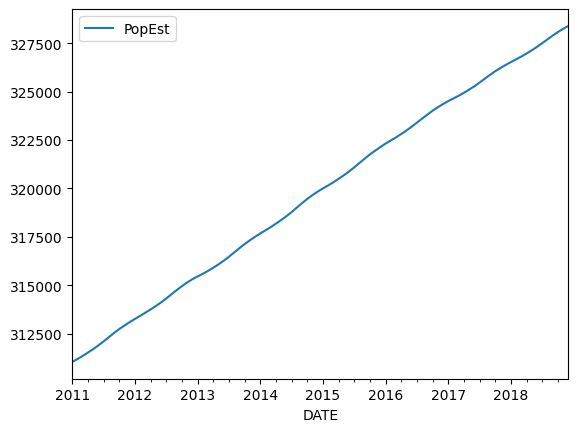

In [8]:
df.plot()

In [9]:
len(df)

96

In [10]:
train=df.iloc[:84]
test=df.iloc[84:]

In [11]:
model=AutoReg(train['PopEst'],lags=1)
model_fit=model.fit()

In [12]:
model_fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [13]:
start=len(train)
end=len(train)+len(test)-1

In [14]:
model_fit.predict(start,end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [15]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [16]:
prediction1=model_fit.predict(start,end)
prediction1=prediction1.rename('prediction1')
prediction1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: prediction1, dtype: float64

<Axes: xlabel='DATE'>

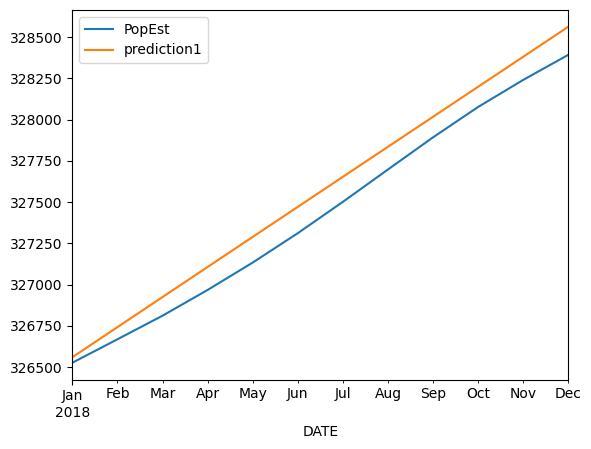

In [17]:
test.plot(legend=True)
prediction1.plot(legend=True)

In [60]:
model2=AutoReg(train['PopEst'],lags=2)
model_fit2=model2.fit()
prediction2=model_fit2.predict(start,end)
prediction2=prediction2.rename('prediction2')
prediction2

2018-01-01    326535.672503
2018-02-01    326694.718510
2018-03-01    326854.882250
2018-04-01    327015.944949
2018-05-01    327177.719499
2018-06-01    327340.045896
2018-07-01    327502.787331
2018-08-01    327665.826848
2018-09-01    327829.064481
2018-10-01    327992.414810
2018-11-01    328155.804860
2018-12-01    328319.172309
Freq: MS, Name: prediction2, dtype: float64

<Axes: xlabel='DATE'>

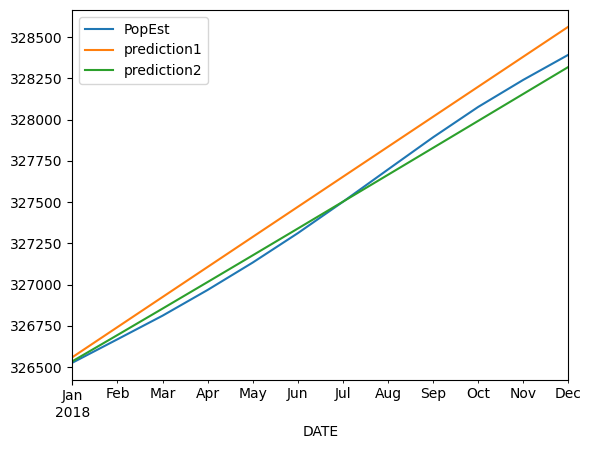

In [61]:
test.plot(legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)

In [62]:
mod=ar_select_order(train['PopEst'],maxlag=30,glob=False,ic='bic',trend='t')
mod.ar_lags

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [63]:
mod.aic

{(1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30): 296.4418772249458,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27): 300.6094659413601,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28): 302.0083513348619,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29): 302.7845647496956,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24): 309.29608226056416,
 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14): 309.3368851136952,
 (1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  

In [64]:
best_model=AutoReg(train['PopEst'],lags=mod.ar_lags)
model_fit3=best_model.fit()
prediction3=model_fit3.predict(start,end)
prediction3=prediction3.rename('prediction3')
prediction3

2018-01-01    326520.461645
2018-02-01    326651.254187
2018-03-01    326783.424604
2018-04-01    326927.205049
2018-05-01    327084.129599
2018-06-01    327254.436038
2018-07-01    327439.587799
2018-08-01    327632.912218
2018-09-01    327827.654181
2018-10-01    328011.530083
2018-11-01    328177.717079
2018-12-01    328330.796464
Freq: MS, Name: prediction3, dtype: float64

<Axes: xlabel='DATE'>

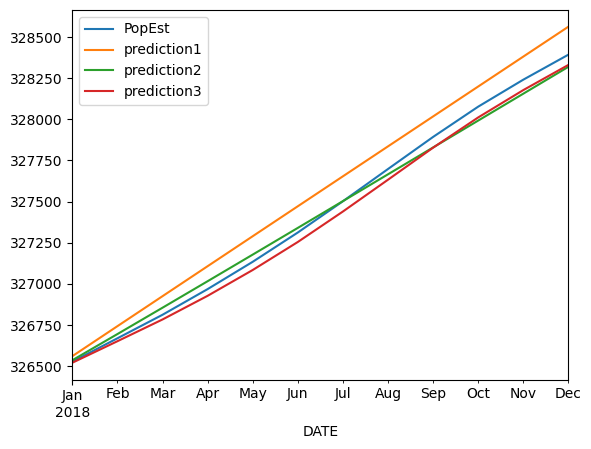

In [65]:
test.plot(legend=True)
prediction1.plot(legend=True)
prediction2.plot(legend=True)
prediction3.plot(legend=True)

In [66]:
from sklearn.metrics import mean_squared_error

In [68]:
labels=['AR1','AR2','AR3']
preds=[prediction1,prediction2,prediction3]
for i in range(len(preds)):
  print(labels[i],np.sqrt(mean_squared_error(test['PopEst'],preds[i])))

AR1 132.09736649865175
AR2 52.08894856681525
AR3 52.600069807297366


In [71]:
model=AutoReg(df['PopEst'],lags=8)
model_fit=model.fit()
forcats_values=model_fit.predict(start=len(df),end=len(df)+12)
forcats_values.rename('forecast')

2019-01-01    328537.134651
2019-02-01    328675.917668
2019-03-01    328818.863445
2019-04-01    328973.057044
2019-05-01    329142.516013
2019-06-01    329325.479628
2019-07-01    329516.233675
2019-08-01    329709.938214
2019-09-01    329899.389426
2019-10-01    330077.704648
2019-11-01    330242.358657
2019-12-01    330394.543321
2020-01-01    330538.845784
Freq: MS, Name: forecast, dtype: float64

<Axes: xlabel='DATE'>

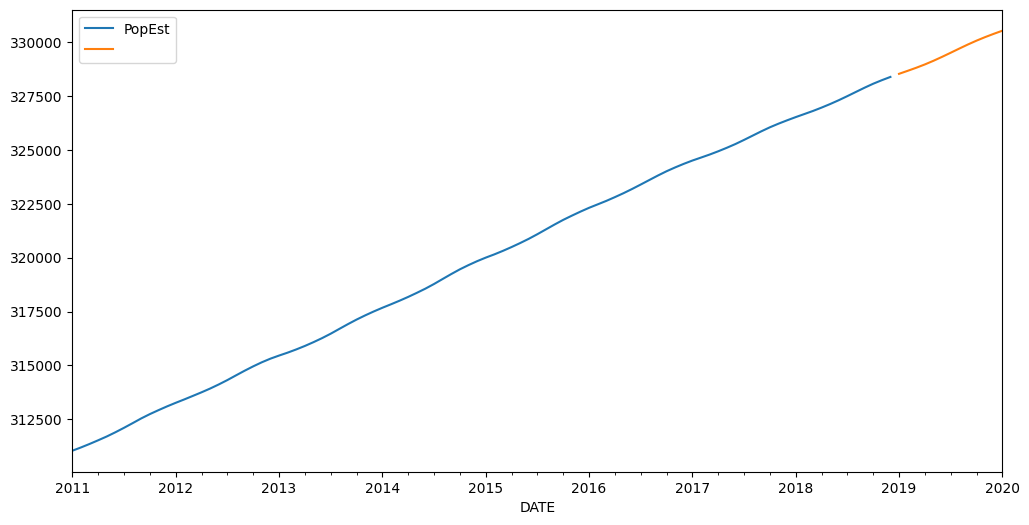

In [72]:
df['PopEst'].plot(legend=True,figsize=(12,6))
forcats_values.plot(legend=True)